<p><img alt="Colaboratory logo" height="65px" src="https://upload.wikimedia.org/wikipedia/en/thumb/b/b1/Davivienda_logo.svg/1200px-Davivienda_logo.svg.png" align="left" hspace="10px" width="20%" vspace="15px"></p>

<h1 align="center"> Prueba Técnica Profesional III Departamento de Datos no Estructurados  </h1>


En el Departamento de Datos No Estructurados buscamos personas con excelentes capacidades técnicas a las que les guste explorar los últimos avances en IA para asumir retos de especial dificultad. Aunque la siguiente prueba busca, en primera instancia, corroborar su idoneidad técnica, para nosotros es muy importante que esta destreza venga acompañada de dos elementos adicionales:

1.   Creatividad para encarar desafíos técnicos en procesamiento de datos no estructurados.
2.   Habilidad para comunicar el trabajo hecho y sus resultados a un público general o experto.


---


### **Análisis de Tweets** 

Una de las actividades tipicas en el departamento es el analisis, mineria de texto y procesamiento de lenguaje natural para los diferentes procesos operativos o que tienen interacción con el Banco. Para este ejercicio se adjutará un base de datos llamada **davivienda_tweets.csv** o directamente puede descargarla empleando el siguiente comando.

```
!wget "https://raw.githubusercontent.com/yemoncada/davivienda_tweets/main/davivienda_tweets.csv" -P "/content"
```

Este archivo contiene un conjunto de **tweets extraidos de la red social** de Twitter que contienen la palabra **Davivienda** y con el cual quisieramos conocer cual es la interacción que tienen los diferentes usuarios de la red social con el Banco Davivienda. Todo esto a partir de una exploración general de lo que esta en los textos, cabe destacar que este notebook esta diseñado para que realice una exploración guiada y que por medio de esta vaya realizando sus propios descubrimientos e insights sobre la base de datos.

Por último y con la finalidad de obtener un analisis más detallado, realice un modelo no supervisado Latent Dirichlet Allocation (LDA) que permita conocer por topicos, cuales son los temas más hablados en Twitter asociados a la palabra Davivienda.

<p><img alt="Colaboratory logo" src="https://i.ibb.co/3zNV9vX/1-Gp-PEknl-KMQ09-Uk-Et-Y6-MZOw.png" align="left" hspace="10px" vspace="15px"></p>


***Nota***: *Considere que este ejercicio es hipotético y el banco no usará su trabajo más que para evaluar sus habilidades para el cargo*

# **Mineria de Texto - Davivienda Tweets.**

## 1. **Análisis Exploratorio**

En este apartado se realiza el análisis exploratorio y descriptivo de la base de datos davivienda_tweets.csv

En primer lugar ***se importan las librerías que se van a utilizar para el tratamiento de textos y NLP***, como nltk, string, re, y en especial pandas. También se carga al notebook el csv con el dataset.

In [ ]:
!pip install pyLDAvis

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import nltk
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, RegexpTokenizer

nltk.download('punkt')
nltk.download('stopwords')

!wget "https://raw.githubusercontent.com/yemoncada/davivienda_tweets/main/davivienda_tweets.csv" -P "/content"  # importación del dataset

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
--2022-02-01 22:35:34--  https://raw.githubusercontent.com/yemoncada/davivienda_tweets/main/davivienda_tweets.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 677050 (661K) [text/plain]
Saving to: ‘/content/davivienda_tweets.csv.1’

davivienda_tweets.c 100%[===================>] 661.18K  --.-KB/s    in 0.005s  

2022-02-01 22:35:34 (129 MB/s) - ‘/content/davivienda_tweets.csv.1’ saved [677050/677050]



Una vez que se carga el dataset al cuaderno, empleamos la estructura de DataFrame de la librería de Pandas, la cual es altamente recomendada en análisis de datos. Para tal fin se usa el comando `df=pd.read_csv('/content/davivienda_tweets.csv')`, donde `df` es el nombre del DataFrame que contiene todo el dataset de tweets.

A continuación se indica cuántas observaciones (tweets) y atributos o columnas tiene el dataset. También los 5 primeros del mismo.

In [ ]:
df=pd.read_csv('/content/davivienda_tweets.csv')

pd.set_option("display.max_rows", None, "display.max_columns", None)    # se quita el límite de columnas y filas visualizadas
pd.set_option('display.max_colwidth', 25)  # se truncan los textos en 25 caracteres

print("El dataset tiene {} observaciones (tweets) y {} atributos. \n".format(df.shape[0],df.shape[1]))
print("Se presentan los primeros 5 tweets del dataset:  \n")
display(df.head())

El dataset tiene 1811 observaciones (tweets) y 12 atributos. 

Se presentan los primeros 5 tweets del dataset:  



,Unnamed: 0,UserScreenName,UserName,Timestamp,Text,Embedded_text,Emojis,Comments,Likes,Retweets,Image link,Tweet URL
0,0,Andrés Langebaek,@ALangebaek,2021-12-01T20:43:12.000Z,Andrés Langebaek\n@AL...,La confianza se afect...,NaN,1.0,7,19,['https://pbs.twimg.c...,https://twitter.com/A...
1,1,Plaza Futura,@plaza_futura,2021-12-01T21:18:10.000Z,Plaza Futura\n@plaza_...,Buscamos la accesibil...,✅ ✅ ✅ ✅ ✅,NaN,NaN,NaN,['https://pbs.twimg.c...,https://twitter.com/p...
2,2,Julián Martinez,@JulianM998,2021-12-01T22:49:11.000Z,Julián Martinez\n@Jul...,Señores \n@Davivienda...,NaN,1.0,NaN,1,[],https://twitter.com/J...
3,3,Ferchis.,@fergomezr28,2021-12-01T12:29:07.000Z,Ferchis.\n@fergomezr2...,Llevo toda una semana...,NaN,2.0,1,2,[],https://twitter.com/f...
4,4,MirandaL2,@MirandaSuspLo,2021-12-01T20:52:36.000Z,MirandaL2\n@MirandaSu...,Hemos retrocedido tan...,NaN,3.0,NaN,8,[],https://twitter.com/M...


Como se puede observar, el dataset contiene 1811 tweets con toda la información que es posible conocer sobre cada uno de ellos (12 atributos o columnas): nombre de quién lo publicó, fecha, texto, número de reacciones, imágenes empleadas, etc...

Como primer acercamiento, se filtran los ***tweets que tuvieron más retweets***, ya que serían los tweets que tuvieron más impacto en la red social dentro del dataset.

In [ ]:
print(df.Retweets.unique()) # se observa cuántos valores de retweets se presentan en el dataset

['19' nan '1' '2' '8' '6' '3' '4' '171' '9' '5' '11' '14' '10' '89' '38'
 '43' '18' '15' '16' '60' '123' '48' '7' '1 mil' '25' '13' '17' '23'
 '2,5 mil' '252' '12' '855' '20' '24']


In [ ]:
# convertir los valores tipo string a enteros de la columna retweets

df = df.replace(['1 mil'],1000)     # se reemplazan valores no tratables como int, tales como "1 mil" y "2,5 mil"
df = df.replace(['2,5 mil'],2500)

df["Retweets"] = pd.to_numeric(df["Retweets"])    # str to int

data_by_retweets = df.sort_values(["Retweets","UserScreenName"], ascending=False)  # ordenar el dataset por cantidad de retweets

pd.set_option('display.max_colwidth', None) 
display(data_by_retweets.head())    # visualizar los tweets con más retweets del dataset

,Unnamed: 0,UserScreenName,UserName,Timestamp,Text,Embedded_text,Emojis,Comments,Likes,Retweets,Image link,Tweet URL
1134,1134,Wilson Arias,@wilsonariasc,2021-12-17T10:20:00.000Z,Wilson Arias\n@wilsonariasc\n·\n17 dic.,"He conocido de primera mano un caso en el que funcionarios de \n@Davivienda\n, con aparente falsificación de firmas, cambiaron cláusulas de un contrato de promesa de compraventa y se terminaron beneficiando de más de $1.000 millones de pesos. Hacen y desasen sin que nadie los vigile.\n87\n1,5 mil\n2,5 mil",NaN,87.0,"1,5 mil",2500.0,[],https://twitter.com/wilsonariasc/status/1471787252963368962
779,779,Maria Niny Echeverry,@Marianiniecheve,2021-12-15T19:01:12.000Z,Maria Niny Echeverry\n@Marianiniecheve\n·\n15 dic.,Chicos: me ayudarían a denunciar a \n@SegurosBolivar\n me están robando literalmente platas de mi cuenta bancaria con la complicidad de \n@Davivienda\n y nadie responde. \n65\n838\n1 mil,😡 😡 😡,65.0,838,1000.0,[],https://twitter.com/Marianiniecheve/status/1471193643516149761
1731,1731,Alejandro Betancurth,@AlejoBetancurt7,2021-12-22T17:35:04.000Z,Alejandro Betancurth\n@AlejoBetancurt7\n·\n22 dic.,"Fajardo no hace con alianza con Petro porque, en 2018, recolectar 980 mil firmas le costó $531 millones, con dinero de: Argos, Sura, Seguros Bolívar, Davivienda y Mineros S.A, empresa extractora de oro y con proyectos mineros e hidroeléctricos en Antioquia.\n\nEl resto es carreta.\n5\n326\n855",NaN,5.0,326,855.0,[],https://twitter.com/AlejoBetancurt7/status/1473708683548839936
1137,1137,Beatriz Torres,@Beatriz14470382,2021-12-17T16:18:21.000Z,Beatriz Torres\n@Beatriz14470382\n·\n17 dic.,"Urge re estructuración al interior del \n@CeDemocratico\n! Lo Uribistas añoramos tener en sus filas a quienes no olviden los principios básicos: Trabajo, Seguridad Democrática, Confianza Inversionista! Los que no se ajusten, “están como Davivienda” \n16\n115\n252",😡,16.0,115,252.0,[],https://twitter.com/Beatriz14470382/status/1471877434182184966
51,51,Hernán Peláez Restrepo,@eldoctorpelaez,2021-12-02T19:13:12.000Z,Hernán Peláez Restrepo\n@eldoctorpelaez\n·\n2 dic.,"Cada vez que me encuentro a Willington Ortíz le digo: ""has debido jugar en Davivienda, porque estabas en el lugar (época) equivocada. #PelaezdeFranciscoenLaW\n6\n16\n171",NaN,6.0,16,171.0,[],https://twitter.com/eldoctorpelaez/status/1466485621841702919


A continuación, se calcula ***cuántos usuarios diferentes participaron en el datset***, ya que algunos usuarios podrían aparecer más de una vez en el mismo. También se visualiza cuáles fueron los que más participaron, o fueron más frecuentes.

El dataset cuenta con la participación de 1145 personas, tales como 
Andrés Langebaek, Plaza Futura, Julián Martinez, Ferchis., MirandaL2, John Jairo Peralta Bernal, Universidad El Bosque, Cristian Julian, Santiago Parra Angel, Andres Moreno Jaramillo... 



/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 120436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 120469 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 120435 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 120466 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 120458 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 120459 missing from current font.
  fon

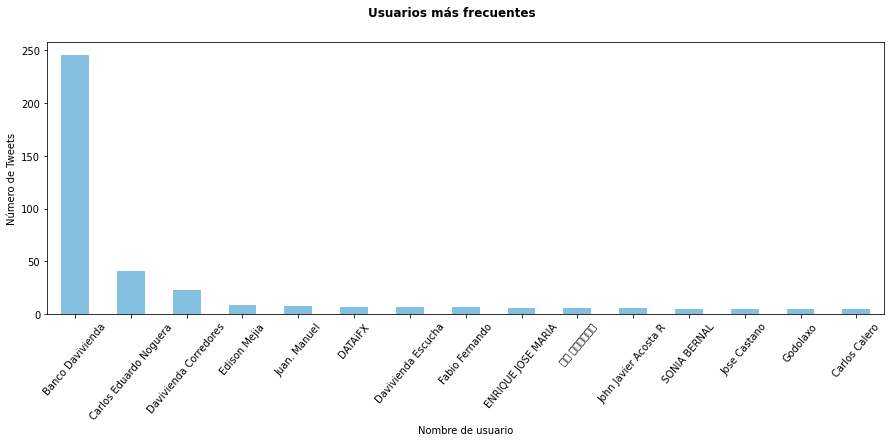

In [ ]:

print("El dataset cuenta con la participación de {} personas, tales como \n{}... \n".format(len(df.UserScreenName.unique()),
                                                                                      ", ".join(df.UserScreenName.unique()[0:10])))
user_names = df.groupby("UserScreenName")

fig, ax = plt.subplots(figsize=(15,5))
fig.suptitle("Usuarios más frecuentes",fontweight="bold")

# se visualiza quiénes fueron los usuarios más frecuentes, además de la cantidad de tweets dentro del dataset
user_names.size().sort_values(ascending=False).nlargest(15).plot.bar(color=(0.2, 0.6, 0.8, 0.6))

plt.xticks(rotation=50)
plt.xlabel("Nombre de usuario")
plt.ylabel("Número de Tweets")

plt.show()

De igual manera, se busca ***conocer el rango de fechas en que los tweets fueron publicados***. Para esto es necesario "truncar" parte de los valores de la columna Timestamp, ya que también contienen información de la hora del día en que se publicó.

En la gráfica se puede observar que el dataset corresponde a los trinos que han mencionado a Davivienda entre el 1 y 22 de diciembre del 2021.

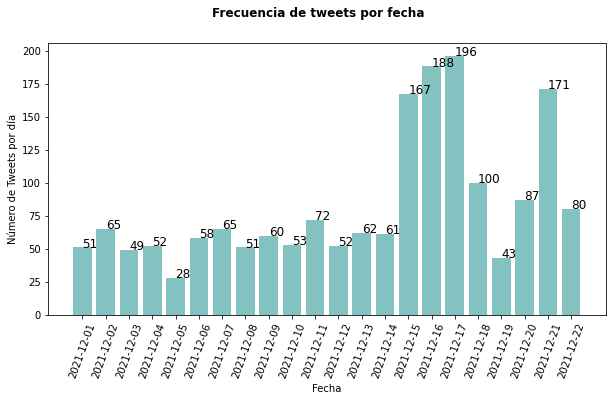

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

# lista para almacenar la información de la fecha
time_stamps_only_date = []

# ciclo para truncar cada valor hasta la información de la fecha, removiendo la hora
for i in range(len(df)):
  time_stamps_only_date.append(df['Timestamp'][i][:10])

# se cuentan las fechas en que hubo publicaciones, además de cuántas hubo cada día
dates_keys = Counter(time_stamps_only_date).keys()
dates_frequency = Counter(time_stamps_only_date).values()

# visualización
fig, ax = plt.subplots(figsize=(10,5))
fig.suptitle("Frecuencia de tweets por fecha",fontweight="bold")

ax.bar(dates_keys, dates_frequency, color=(0.2, 0.6, 0.6, 0.6))
plt.xticks(rotation=70)
plt.xlabel("Fecha")
plt.ylabel("Número de Tweets por día")
for i,j in zip(dates_keys,dates_frequency):
    ax.text(i,j,str(j),size=12)

plt.show()


## **2. Procesamiento de Texto**

Para empezar a trabajar con el contenido de cada tweet, hay que fijarnos en el atributo de **"Embedded_text"**, que es en donde se almacena el texto de cada uno.

Para conocer cuáles fueron las palabras más empleadas en todo el dataset, dentro del texto de las publicaciones, se debe hacer una tokenización en palabras, además de remover palabras conocidas como "stopwords", signos de puntuación, números y demás caracteres como # o @.

In [ ]:
from nltk.stem.snowball import SnowballStemmer

embedded_texts = ""

# guardar los textos de cada tweet en una variable str llamada embedded_texts
for i in range(len(df)):
  embedded_texts += "\n"+df['Embedded_text'][i]

# eliminar números de los textos
embedded_texts = re.sub(r'\d+', '', embedded_texts)
# eliminar signos de puntuación de los textos
embedded_texts = "".join([char.lower() for char in embedded_texts if char not in string.punctuation]) 
# convertir el texto a minúsculas
embedded_texts =  embedded_texts.lower()
# estematizar
stemmer = SnowballStemmer("spanish")
embedded_texts = stemmer.stem(embedded_texts)

# se recogen las stopwords más comunes en el español
stop_words = set(stopwords.words('spanish'))

# tokenización de los textos de los tweets
word_tokens = word_tokenize(embedded_texts)  

filtro = []
# se filtran las palabras que no son stopwords, para que solo queden las palabras con significado propio
for palabra in word_tokens:
  if palabra not in stop_words:
    if len(palabra) > 2:   # filtrar palabras muy pequeñas, como de menos de 2 caracteres
      filtro.append(palabra)

print("Filtro: ",filtro)


Filtro:  ['confianza', 'afecto', 'indicador', 'confianza', 'davivienda', 'leve', 'caida', 'noviembre', 'rompiendo', 'tendencia', 'cinco', 'meses', 'mejoras', 'indicador', 'deterioro', 'especialmente', 'ultima', 'semana', 'mes', 'asociado', 'aumento', 'tasa', 'cambio', 'buscamos', 'accesibilidad', 'mejor', 'atencion', 'tramites', 'bancarios', 'ello', 'encuentras', 'plaza', 'siguientes', 'bancos', 'preferencia', 'banco', 'cuscatlan', 'banco', 'fedecredito', 'davivienda', 'bancoagricola', 'banco', 'promerica', 'señores', 'davivienda', 'podido', 'ingresar', 'app', 'davivienda', 'ingreso', 'cedula', 'dice', 'verifique', 'datos', 'llevo', 'asi', 'varios', 'dias', 'llevo', 'toda', 'semana', 'sufriendo', 'intento', 'hurto', 'medios', 'electronicos', 'cuenta', 'ahorros', 'davivienda', 'puedan', 'realizar', 'plata', 'felices', 'hicieron', 'pudieron', 'tenia', 'cupo', 'libre', '¿que', 'pasando', 'davivienda', 'retrocedido', 'pais', 'gobierno', 'malparidos', 'cajeros', 'davivienda', 'dizque', 'sol

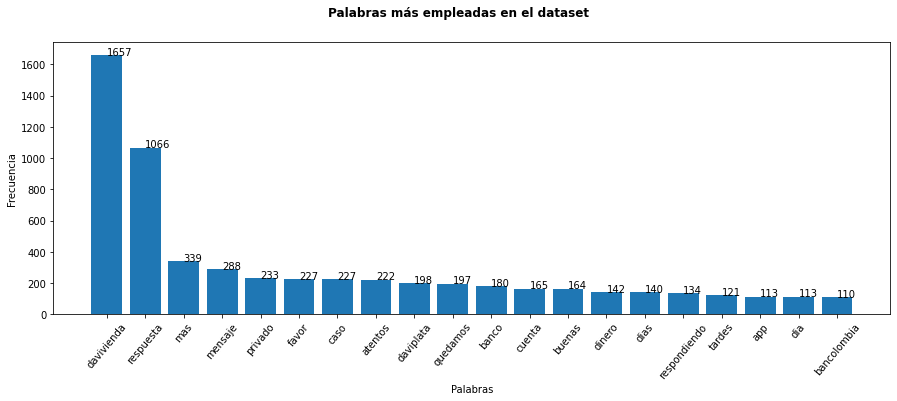

In [ ]:
from collections import Counter
from collections import OrderedDict

c = Counter(filtro)

# se crean listas con las palabras con mayores repeticiones (words) y la cuenta de repeticiones (counts)
words = [word for word, _ in c.most_common(20)]
counts = [counts for _, counts in c.most_common(20)]

# visualización
fig, ax = plt.subplots(figsize=(15,5))
fig.suptitle("Palabras más empleadas en el dataset",fontweight="bold")

ax.bar(words, counts)
plt.xticks(rotation=50)
plt.ylabel("Frecuencia")
plt.xlabel("Palabras")

for i,j in zip(words,counts):
    ax.text(i,j,str(j),size=10)

plt.show()

Se observa que la palabra más empleada en todo el dataset es "davivienda". En realidad es un resultado esperado, y que no aporta mucha información, ya que es conocido que el dataset contiene tweets que hablan del banco Davivienda. 

Con el fin de darle más importancia a otras palabras, se puede considerar Davivienda como una stopword, y se vuelve a filtrar la información.

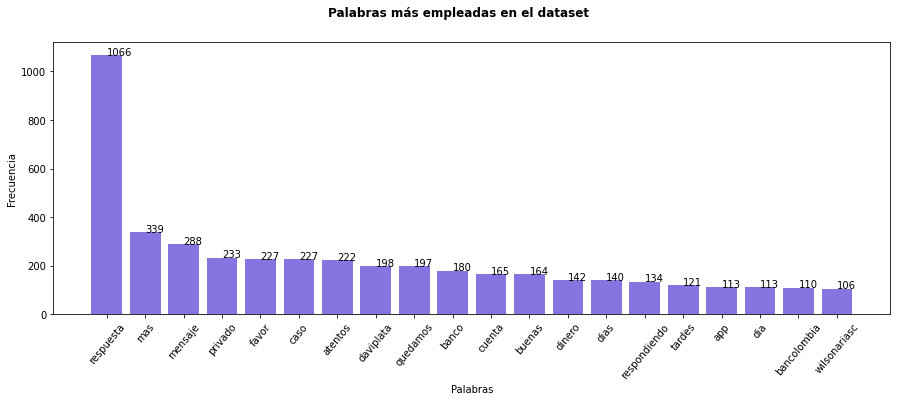

In [ ]:
stop_words.add("davivienda")

data_words = []
# se filtran las palabras que no son stopwords, para que solo queden las palabras con significado propio
for palabra in word_tokens:
  if palabra not in stop_words:
    if len(palabra) > 2:
      data_words.append(palabra)

c = Counter(data_words)

# se crean listas con las palabras con mayores repeticiones (words) y la cuenta de repeticiones (counts)
words = [word for word, _ in c.most_common(20)]
counts = [counts for _, counts in c.most_common(20)]

# visualización
fig, ax = plt.subplots(figsize=(15,5))
fig.suptitle("Palabras más empleadas en el dataset",fontweight="bold")

ax.bar(words, counts, color=(0.2, 0.1, 0.8, 0.6))
plt.xticks(rotation=50)
plt.ylabel("Frecuencia")
plt.xlabel("Palabras")

for i,j in zip(words,counts):
    ax.text(i,j,str(j),size=10)

plt.show()

Se optó por dividir el dataset en dos: ***tweets hechos por la cuenta de Banco Davivienda y por los usuarios***. De esta manera se procura interpretar la participación que ambas partes tienen en el conjunto de datos, además de las palabras más repetidas por ellos.

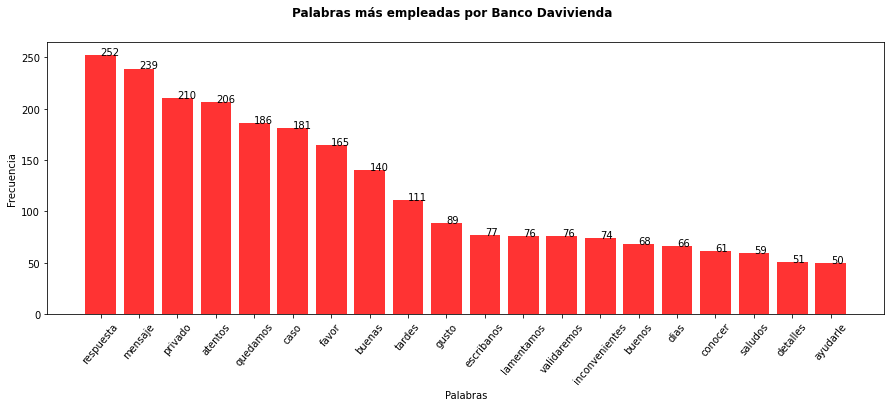

In [ ]:
##### PALABRAS MÁS EMPLEADAS POR LA CUENTA DEL BANCO DAVIVIENDA ######

df_davivienda = df.loc[df['UserScreenName'] == 'Banco Davivienda']

# display(df_davivienda)

embedded_texts = ""

# guardar los textos de cada tweet en una variable str llamada embedded_texts
for i in range(len(df_davivienda)):
  embedded_texts += "\n"+np.array(df_davivienda)[i][5]

# eliminar números de los textos
embedded_texts = re.sub(r'\d+', '', embedded_texts)
# eliminar signos de puntuación de los textos
embedded_texts = "".join([char.lower() for char in embedded_texts if char not in string.punctuation]) 
# convertir el texto a minúsculas
embedded_texts =  embedded_texts.lower()
# estematizar
stemmer = SnowballStemmer("spanish")
embedded_texts = stemmer.stem(embedded_texts)

# se recogen las stopwords más comunes en el español
stop_words = set(stopwords.words('spanish'))
stop_words.add("davivienda")

# tokenización de los textos de los tweets
word_tokens = word_tokenize(embedded_texts)  

filtro = []
# se filtran las palabras que no son stopwords, para que solo queden las palabras con significado propio
for palabra in word_tokens:
  if palabra not in stop_words:
    if len(palabra) > 2:   # filtrar palabras muy pequeñas, como de menos de 2 caracteres
      filtro.append(palabra)

c = Counter(filtro)

# se crean listas con las palabras con mayores repeticiones (words) y la cuenta de repeticiones (counts)
words = [word for word, _ in c.most_common(20)]
counts = [counts for _, counts in c.most_common(20)]

# visualización
fig, ax = plt.subplots(figsize=(15,5))
fig.suptitle("Palabras más empleadas por Banco Davivienda",fontweight="bold")

ax.bar(words, counts, color=(1, 0, 0, 0.8))
plt.xticks(rotation=50)
plt.ylabel("Frecuencia")
plt.xlabel("Palabras")

for i,j in zip(words,counts):
    ax.text(i,j,str(j),size=10)

plt.show()


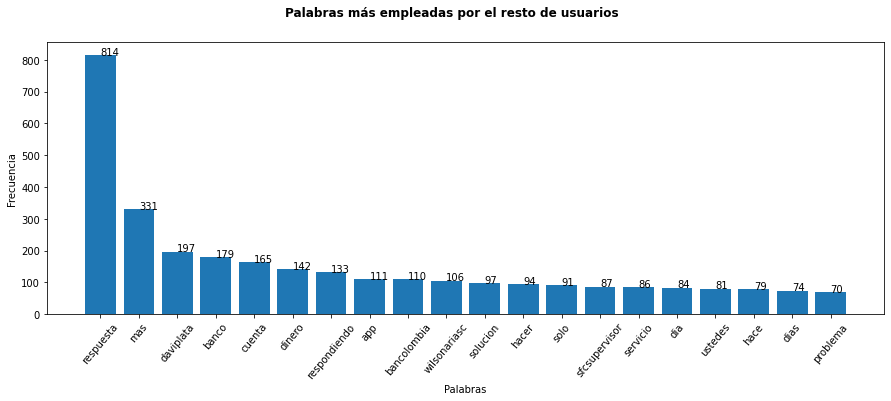

In [ ]:
##### PALABRAS MÁS EMPLEADAS POR LOS USUARIOS ######

df_no_davivienda = df[df['UserScreenName'] != 'Banco Davivienda']

embedded_texts = ""

# guardar los textos de cada tweet en una variable str llamada embedded_texts
for i in range(len(df_no_davivienda)):
  embedded_texts += "\n"+np.array(df_no_davivienda)[i][5]

# eliminar números de los textos
embedded_texts = re.sub(r'\d+', '', embedded_texts)
# eliminar signos de puntuación de los textos
embedded_texts = "".join([char.lower() for char in embedded_texts if char not in string.punctuation]) 
# convertir el texto a minúsculas
embedded_texts =  embedded_texts.lower()
# estematizar
stemmer = SnowballStemmer("spanish")
embedded_texts = stemmer.stem(embedded_texts)

# se recogen las stopwords más comunes en el español
stop_words = set(stopwords.words('spanish'))
stop_words.add("davivienda")

# tokenización de los textos de los tweets
word_tokens = word_tokenize(embedded_texts)  

filtro = []
# se filtran las palabras que no son stopwords, para que solo queden las palabras con significado propio
for palabra in word_tokens:
  if palabra not in stop_words:
    if len(palabra) > 2:   # filtrar palabras muy pequeñas, como de menos de 2 caracteres
      filtro.append(palabra)

c = Counter(filtro)

# se crean listas con las palabras con mayores repeticiones (words) y la cuenta de repeticiones (counts)
words = [word for word, _ in c.most_common(20)]
counts = [counts for _, counts in c.most_common(20)]

# visualización
fig, ax = plt.subplots(figsize=(15,5))
fig.suptitle("Palabras más empleadas por el resto de usuarios",fontweight="bold")

ax.bar(words, counts)
plt.xticks(rotation=50)
plt.ylabel("Frecuencia")
plt.xlabel("Palabras")

for i,j in zip(words,counts):
    ax.text(i,j,str(j),size=10)

plt.show()

Se dibujó una ***nube de palabras*** con forma circular, con el propósito de presentar las palabras más repetidas y relevantes dentro del dataset.

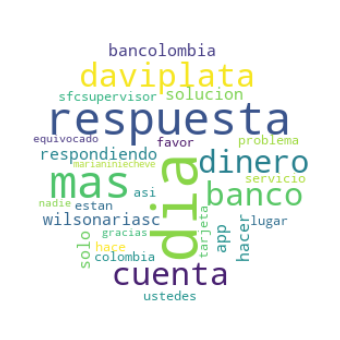

In [ ]:
import json
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

ord_dict = OrderedDict(c.most_common(30))
st = ord_dict.keys()

new_d = [str(key) for key in st]

# comprension de listas
new_d = ' '.join(map(str, new_d))

# una esfera para la máscara de la nube
x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

# crear y generar la nube
wordcloud = WordCloud(background_color="white",mask=mask).generate(new_d)

# visualizar la nube
plt.figure(figsize=(6,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## **3. Matriz término-documento - Document-Term Matrix**

Para representar la aparición de las palabras en un texto se construye una matriz término-documentos, la cual analiza las palabras similares o respetidas entre documentos.

En este caso, se realiza una matriz término-documento de la siguiente manera: **se inspeccionaron las palabras empleadas en todo el dataset por cada semana**. A continuación se muestra la matriz con las 20 palabras más empleadas en el dataset.

In [ ]:
from nltk.stem.snowball import SnowballStemmer

texts_week1 = ""
texts_week2 = ""
texts_week3 = ""

texts_weeks = [texts_week1, texts_week2, texts_week3]
lists_texts_weeks = []
lists_aranges = [np.arange(368),np.arange(368,779),np.arange(779,1811)]

# guardar los textos de cada tweet en una variable str llamada embedded_texts
for textos, rango in zip(texts_weeks, lists_aranges):
  for i in rango:
    textos += "\n"+df['Embedded_text'][i]

    # eliminar números de los textos
    textos = re.sub(r'\d+', '', textos)
    # eliminar signos de puntuación de los textos
    textos = "".join([char.lower() for char in textos if char not in string.punctuation]) 
    # convertir el texto a minúsculas
    textos =  textos.lower()
    # estematizar
    stemmer = SnowballStemmer("spanish")
    textos = stemmer.stem(textos)

    # tokenización de los textos de los tweets
    word_tokens = word_tokenize(textos)  

    list_words = []
    # se filtran las palabras que no son stopwords, para que solo queden las palabras con significado propio
    for palabra in word_tokens:
      if palabra not in stop_words:
        if len(palabra) > 2:   # filtrar palabras muy pequeñas, como de menos de 3 caracteres
          list_words.append(palabra)

    list_words = ' '.join(list_words)
    
  lists_texts_weeks.append(list_words)
  

print("len lists texts weeks: ",len(lists_texts_weeks))

len lists texts weeks:  3


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
X = vec.fit_transform(lists_texts_weeks)

td = pd.DataFrame(X.todense())
td.columns = vec.get_feature_names_out()
term_document_matrix = td.T
term_document_matrix.columns = ['Semana '+str(i) for i in range(1, 4)]
term_document_matrix['total_count'] = term_document_matrix.sum(axis=1)

term_document_matrix = term_document_matrix.sort_values(by ='total_count',ascending=False)[:20] 

print(term_document_matrix.head(20))

              Semana 1  Semana 2  Semana 3  total_count
respuesta          161       207       694         1062
mas                 81        80       178          339
mensaje             19        20       249          288
privado              5        15       213          233
favor               21        20       186          227
caso                14        15       196          225
quedamos             6         9       182          197
daviplata           42        39       114          195
banco               47        46        86          179
cuenta              30        44        91          165
buenas               7        18       139          164
atentos              4         5       143          152
dinero              38        26        78          142
dias                28        24        88          140
respondiendo        23        33        78          134
tardes               7        12       102          121
app                 50        22        41      

## **4. Latent Dirichlet Allocation - Modelo no supervisado de Tópicos.**

*El topic modeling es una técnica no supervisada de NLP, capaz de detectar y extraer de manera automática relaciones semánticas latentes de grandes volúmenes de información.*

*Estas relaciones son los llamados tópicos, que son un conjunto de palabras que suelen aparecer juntas en los mismos contextos y nos permiten observar relaciones que seríamos incapaces de observar a simple vista.*

En este caso se entrenó un modelo de LDA para 3 temas o tópicos, que fue el valor en que mejor se ajustó para tener balance entre los 3 tópicos. A continuación, también se presentan las palabras con mayor peso en los tópicos estimados.

#### **NOTA:** En caso de ejecutar la celda el entrenamiento del modelo cambiará, cambiando la distribución de los tópicos. Se recomienda no hacerlo para preservar el resultado obtenido en el notebook.

In [ ]:
import gensim.corpora as corpora
from pprint import pprint
import gensim

# crear corpus
texts = [data_words]

# crear diccionario
id2word = corpora.Dictionary(texts)

# frecuencia de palabras en el documento
corpus = [id2word.doc2bow(text) for text in texts]

# numero de topics
num_topics = 3

# LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# palabras principales en los tópicos estimados
pprint(lda_model.print_topics())


[(0,
  '0.027*"respuesta" + 0.010*"mas" + 0.009*"mensaje" + 0.008*"privado" + '
  '0.008*"caso" + 0.007*"favor" + 0.007*"quedamos" + 0.006*"banco" + '
  '0.006*"daviplata" + 0.006*"atentos"'),
 (1,
  '0.036*"respuesta" + 0.010*"mas" + 0.008*"mensaje" + 0.007*"favor" + '
  '0.007*"privado" + 0.006*"atentos" + 0.006*"quedamos" + 0.006*"caso" + '
  '0.005*"buenas" + 0.005*"cuenta"'),
 (2,
  '0.033*"respuesta" + 0.010*"mas" + 0.009*"mensaje" + 0.008*"atentos" + '
  '0.007*"caso" + 0.007*"daviplata" + 0.007*"favor" + 0.006*"privado" + '
  '0.005*"dias" + 0.005*"banco"')]


In [ ]:
import pyLDAvis.gensim_models
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
import pickle 
import pyLDAvis
import os

# visualización de los tópicos
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('/content/ldavis_prepared_'+str(num_topics))

if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# carga del modelo
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, '/content/ldavis_prepared_'+ str(num_topics) +'.html')

LDAvis_prepared

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.000318 -0.002143       1        1  50.728949
1     -0.002361  0.000840       2        1  30.901046
0      0.002043  0.001304       3        1  18.370005, topic_info=                 Term        Freq       Total Category  logprob  loglift
5478        respuesta  869.000000  869.000000  Default  30.0000  30.0000
4011              mas  268.000000  268.000000  Default  29.0000  29.0000
5057          privado  180.000000  180.000000  Default  28.0000  28.0000
5189         quedamos  151.000000  151.000000  Default  27.0000  27.0000
4075          mensaje  232.000000  232.000000  Default  26.0000  26.0000
628             banco  140.000000  140.000000  Default  25.0000  25.0000
979              caso  181.000000  181.000000  Default  24.0000  24.0000
2652            favor  181.000000  181.000000  Default  23.0000  23.0000
1988              dia   85.000000   85.000000  Default  22.0000  22.0000
2046           dinero  110.000000  110.000000  Default  21.0000  21.0000
796            buenas  130.000000  130.000000  Default  20.0000  20.0000
1686        daviplata  163.000000  163.000000  Default  19.0000  19.0000
1601           cuenta  132.000000  132.000000  Default  18.0000  18.0000
5472     respondiendo  106.000000  106.000000  Default  17.0000  17.0000
2959             hace   60.000000   60.000000  Default  16.0000  16.0000
5905         solucion   76.000000   76.000000  Default  15.0000  15.0000
519           atentos  184.000000  184.000000  Default  14.0000  14.0000
2963            hacer   74.000000   74.000000  Default  13.0000  13.0000
5899             solo   72.000000   72.000000  Default  12.0000  12.0000
2425       escribanos   64.000000   64.000000  Default  11.0000  11.0000
3241   inconvenientes   64.000000   64.000000  Default  10.0000  10.0000
2483            estan   55.000000   55.000000  Default   9.0000   9.0000
1999             dias  117.000000  117.000000  Default   8.0000   8.0000
1199         colombia   48.000000   48.000000  Default   7.0000   7.0000
2902          gracias   57.000000   57.000000  Default   6.0000   6.0000
399               app   91.000000   91.000000  Default   5.0000   5.0000
851            cajero   32.000000   32.000000  Default   4.0000   4.0000
4286            nadie   48.000000   48.000000  Default   3.0000   3.0000
4869            plata   43.000000   43.000000  Default   2.0000   2.0000
1131          cliente   41.000000   41.000000  Default   1.0000   1.0000
1672      davemendezl    2.312868    3.512352   Topic1  -8.6721   0.2609
4826             pide    7.329608   11.390361   Topic1  -7.5187   0.2378
2671              feo    2.215205    3.466176   Topic1  -8.7152   0.2310
1937        desgracia    2.136541    3.430899   Topic1  -8.7514   0.2050
1721          deberia    4.747491    7.701838   Topic1  -7.9530   0.1948
2902          gracias   35.236206   57.333365   Topic1  -5.9485   0.1919
2123              dos   16.439280   26.778505   Topic1  -6.7109   0.1907
1921            desea    3.150193    5.153032   Topic1  -8.3631   0.1866
1005           cedula    8.267642   13.532434   Topic1  -7.3982   0.1859
4806           pesima    3.073545    5.043600   Topic1  -8.3878   0.1834
2951         hablando    4.643416    7.631373   Topic1  -7.9751   0.1819
5047          primera    8.863029   14.582196   Topic1  -7.3287   0.1808
228            alguno    2.600746    4.283511   Topic1  -8.5548   0.1797
5479       respuestas    2.610913    4.316028   Topic1  -8.5509   0.1760
2348           entrar    9.645057   15.981320   Topic1  -7.2441   0.1737
5736          seguros    8.801275   14.598031   Topic1  -7.3357   0.1727
1999             dias   70.872036  117.771485   Topic1  -5.2497   0.1708
3862             luis    2.556131    4.252056   Topic1  -8.5721   0.1698
4097              mes    6.109175   10.165035   Topic1  -7.7008   0.1695
4264       multimedia    2.543945    

## **5. Interpretación de Resultados y conclusiones generales.**

Tras observar y analizar los gráficos y resultados obtenidos, se puede llegar a las siguientes conclusiones y observaciones:

####SOBRE LAS PALABRAS MÁS EMPLEADAS Y USUARIOS FRECUENTES:

* Fue necesario examinar las palabras más usadas en el dataset con la participación de la cuenta del Banco Davivienda, como sin ella. Como la cuenta de Twitter del Banco es la más activa en el dataset, observamos que emplea frases como **"buenos días", "buenas tardes, "lamentamos", "estamos atentos"**. En conclusión, gran parte de las palabras más comunes del dataset corresponden a **mensajes de respuesta del Banco**.

* La palabra que más aparece en los textos de los tweets, tanto del Banco como de los usuarios, es **"respuesta"**. Sin embargo, este dato no brinda tanta información, ya que es una palabra que aparece automáticamente al momento de responder un tweet. Las palabras más repetidas después de esta son en verdad las más comunes.

* Encontramos palabras como **daviplata, app y problema** en las más usadas por los usuarios. Si bien Davivienda responde de manera eficiente los reclamos de este tipo, se debe tomar este feedback para conocer el nivel de satisfacción de los usuarios y buscar medidas correctivas para la aplicación Daviplata.

* El nombre del usuario **Wilson Arias (wilsonariasc)** apareció entre las palabras utilizadas con mayor frecuencia por los usuarios. El tweet publicado por esta cuenta es el que más reacciones tiene en el dataset. Lastimosamente, el trino del usuario hace acusaciones negativas al Banco, las cuales  fueron respondidas no solo por el mismo, sino también por otros usuarios.

* Como se observó en la gráfica de usuarios más frecuentes, después del Banco, el usuario que más participación tuvo a lo largo del dataset tiene el nombre de "Carlos Eduardo Noguera". ***Su participación coincide con un problema con la app de daviplata*** entre la segunda y tercera semana del dataset.

* Entre las palabras más empleadas por los usuarios se encuentra la cuenta de la **Superintendencia Financiera de Colombia (sfcsupervisor)**. Generalmente es etiquetada en las publicaciones ya que los usuarios consideran que debe tomar cartas en el asunto.

* Otro de los usuarios de mayor participación, "Edison Mejia", denuncia a **Binance** por el bloqueo de algunas cuentas de criptomonedas. Él relaciona a Davivienda como socio de Binance. Esto sucedió en repetidos trinos entre el 12 y 19 de diciembre.

###SOBRE LAS FECHAS DE ACTIVIDAD:

* Se encontró que las fechas de **mayor actividad corresponden a la tercera y última semana del dataset**, es decir, la tercera semana de diciembre del año 2021. Eventos como el trino de Wilson Arias, coinciden con la alta actividad del día 17 de diciembre y los días cercanos. Cuatro de los cinco tweets con más reacciones corresponden a esta semana.

* El histograma de publicaciones por fechas y la matriz término-documentos hicieron más visible la actividad del Banco en la red social, como se indicó, mayormente en la última semana. Palabras como **daviplata y bancolombia** también se repitieron notablemente esta semana. Se recomienda hacer un análisis de los eventos ocurridos durante dicha semana. Coincide el caso del señor Carlos Eduardo Noguera y posibles fallos en el servicio de Daviplata.

###SOBRE LA ESTIMACIÓN DE TÓPICOS DEL LDA:

* El número de tópicos que mejor funcionó para el modelo LDA fue 3, ya que hubo un balance entre el porcentaje de tokens que cada uno de los tópicos abarca. Sin embargo, fue difícil identificar el tópico al que se refiere, pues coinciden muchas de las palabras frecuentes, en especial las de las respuestas que el Banco hace a los trinos.

* Se recomienda utilizar LDA para las publicaciones del Banco y de los usuarios por separado, y encontrar qué correlación existe entre los tópicos. En este caso, se hizo a todo el conjunto de palabras y no fue posible identificar los tópicos estimados.


###OBSERVACIONES GENERALES:
* Encontramos que los tweets con más reacciones (likes, retweets y comentarios) corresponden, lastimosamente, a ***usuarios quejándose de alguna manera del Banco.*** 

* Existe una **inconsistencia en el etiquetado de los atributos del dataset**. Al ir al enlace de los tweets es evidente que el valor de retweets del dataset corresponde, en realidad, al de los likes. Desafortunadamente, esta observación se hizo al final del análisis y no se pudo corregir para el desarrollo del trabajo.

* La palabra "respuesta" podría, al igual que se hizo con la palabra "davivienda", considerarse como stopword, o como palabra que no vale la pena analizar o contar.


###PROPUESTAS A FUTURO:
* Como se mencionó anteriormente, es posible mejorar la estimación de tópicos partiendo el dataset en tweets de Davivienda y de los usuarios. Se puede considerar entrenamientos más rigurosos, considerando otros parámetros del modelo, como los valores alpha, eta, iteraciones, offset, etc.

* Se podría probar haciendo tokenización en frases y no en palabras. Además, comparar los resultados con los aquí presentados y concluir qué preprocesamiento es más recomendable.

* Se pueden emplear herramientas de ML para entrenar un modelo, por ejemplo, de máquina de soporte vectorial (SVM) para conocer la satisfacción que cada usuario presenta en los tweets. Esto permitiría hacer un balance automático de cuál es la imagen que tienen los usuarios del Banco.

* Sería posible agrupar las publicaciones por el uso de los emojis y encontrar correlaciones en el uso de los mismos.
